In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('drug200.csv')

In [63]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [64]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [65]:
male=pd.get_dummies(df['Sex'],drop_first=True)

In [66]:
BP_dict={'NORMAL':0,'HIGH':1,'LOW':2}
df['BP']=[BP_dict[g] for g in df['BP']]

In [67]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,1,HIGH,25.355,drugY
1,47,M,2,HIGH,13.093,drugC
2,47,M,2,HIGH,10.114,drugC
3,28,F,0,HIGH,7.798,drugX
4,61,F,2,HIGH,18.043,drugY


In [68]:
Chol_dict={'NORMAL':0,'HIGH':1}
df['Cholesterol']=[Chol_dict[g] for g in df['Cholesterol']]

In [69]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,1,1,25.355,drugY
1,47,M,2,1,13.093,drugC
2,47,M,2,1,10.114,drugC
3,28,F,0,1,7.798,drugX
4,61,F,2,1,18.043,drugY
...,...,...,...,...,...,...
195,56,F,2,1,11.567,drugC
196,16,M,2,1,12.006,drugC
197,52,M,0,1,9.894,drugX
198,23,M,0,0,14.020,drugX


In [70]:
from sklearn.preprocessing import LabelEncoder
Lecoder=LabelEncoder()

In [71]:
df['Drug']=Lecoder.fit_transform(df['Drug'])

In [72]:
df=pd.concat([df,male],axis=1)

In [73]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,M
0,23,F,1,1,25.355,4,0
1,47,M,2,1,13.093,2,1
2,47,M,2,1,10.114,2,1
3,28,F,0,1,7.798,3,0
4,61,F,2,1,18.043,4,0
...,...,...,...,...,...,...,...
195,56,F,2,1,11.567,2,0
196,16,M,2,1,12.006,2,1
197,52,M,0,1,9.894,3,1
198,23,M,0,0,14.020,3,1


In [74]:
df.drop('Sex',axis=1,inplace=True)

<Axes: xlabel='Drug', ylabel='count'>

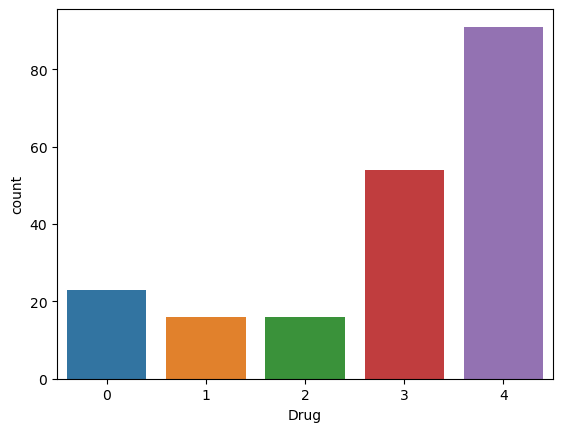

In [75]:
sns.countplot(x=df['Drug'])

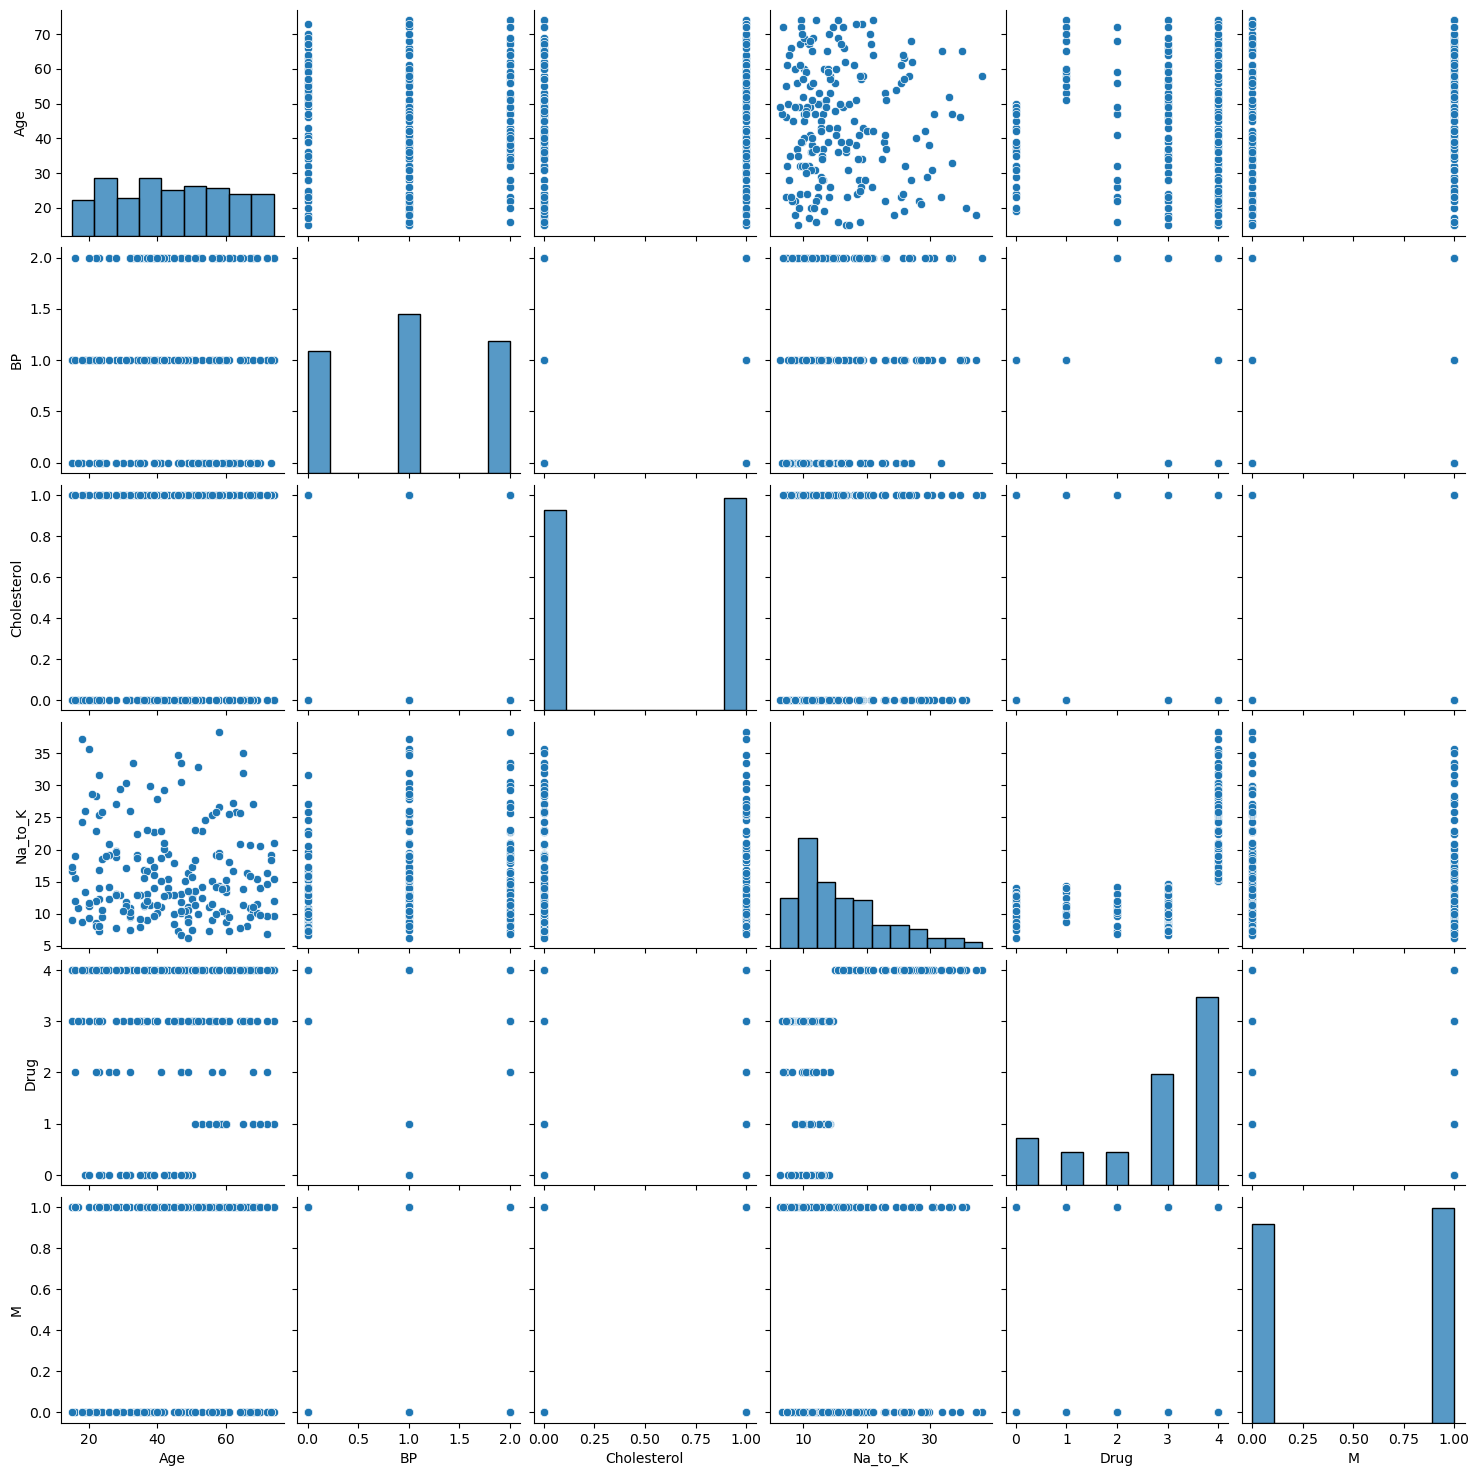

In [34]:
sns.pairplot(data=df)

<Axes: >

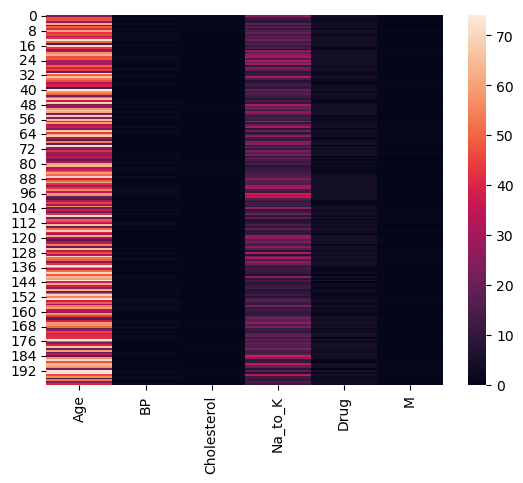

In [35]:
sns.heatmap(df)

<Axes: >

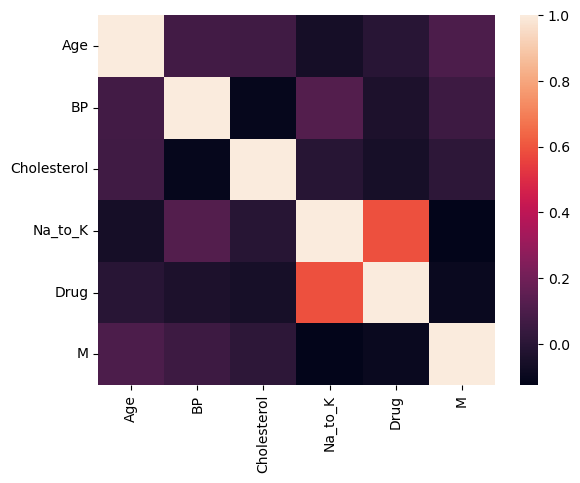

In [36]:
sns.heatmap(df.corr())

<BarContainer object of 200 artists>

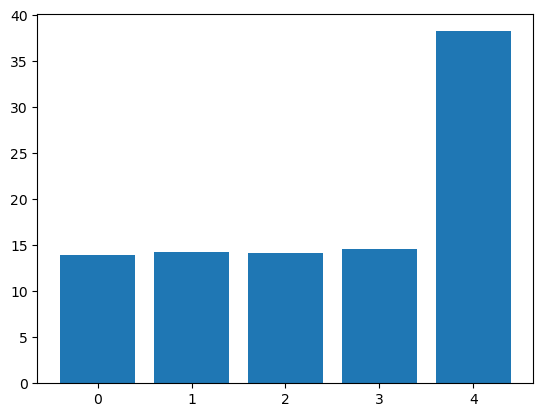

In [76]:
plt.bar(df['Drug'],df['Na_to_K'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


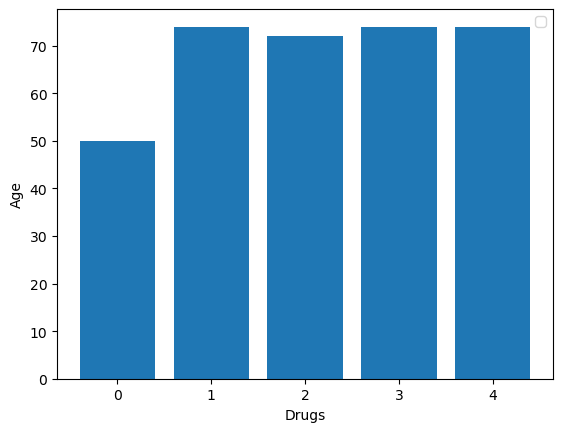

In [82]:
plt.bar(df['Drug'],df['Age'])
plt.xlabel('Drugs')
plt.ylabel('Age')
plt.legend()

In [83]:
y=df['Drug']
X=df.drop(['Drug'],axis=1)

In [84]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [85]:
X

,Age,BP,Cholesterol,Na_to_K,M
0,23,1,1,25.355,0
1,47,2,1,13.093,1
2,47,2,1,10.114,1
3,28,0,1,7.798,0
4,61,2,1,18.043,0
...,...,...,...,...,...
195,56,2,1,11.567,0
196,16,2,1,12.006,1
197,52,0,1,9.894,1
198,23,0,0,14.020,1


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [87]:
X_train

,Age,BP,Cholesterol,Na_to_K,M
158,59,2,1,10.444,0
134,42,1,1,21.036,0
76,36,1,1,11.198,0
74,31,1,0,17.069,1
168,51,2,0,23.003,0
...,...,...,...,...,...
124,53,1,0,12.495,0
167,57,0,1,14.216,0
164,16,1,0,19.007,1
111,47,0,0,6.683,0


In [88]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [89]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
prediction=model.predict(X_test)

In [91]:
prediction

array([0, 0, 4, 4, 3, 4, 3, 4, 3, 4, 1, 1, 4, 0, 0, 0, 4, 4, 3, 0, 4, 3,
       4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4, 3, 4, 4, 4, 4, 3, 0])

In [92]:
y_test

66     0
169    0
180    4
154    4
72     3
59     4
34     3
179    4
105    3
123    4
142    1
186    1
8      4
118    0
36     0
17     0
107    4
6      4
39     3
110    0
166    4
170    3
25     4
0      4
90     4
165    4
163    4
195    2
22     4
108    1
48     4
11     4
190    4
16     3
115    4
75     4
99     4
42     4
182    3
78     0
Name: Drug, dtype: int64

In [93]:
model.score(X_test,y_test)

1.0

In [94]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report

In [95]:
confusion_matrix(y_test,prediction)

array([[ 7,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  0,  0,  0, 22]])

In [96]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       1.00      1.00      1.00         3\n           2       1.00      1.00      1.00         1\n           3       1.00      1.00      1.00         7\n           4       1.00      1.00      1.00        22\n\n    accuracy                           1.00        40\n   macro avg       1.00      1.00      1.00        40\nweighted avg       1.00      1.00      1.00        40\n'